<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/MobileNet_Architecture_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [5]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preparatin using ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
WIDTH=224
HEIGHT=224

In [8]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=20,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [9]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [10]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

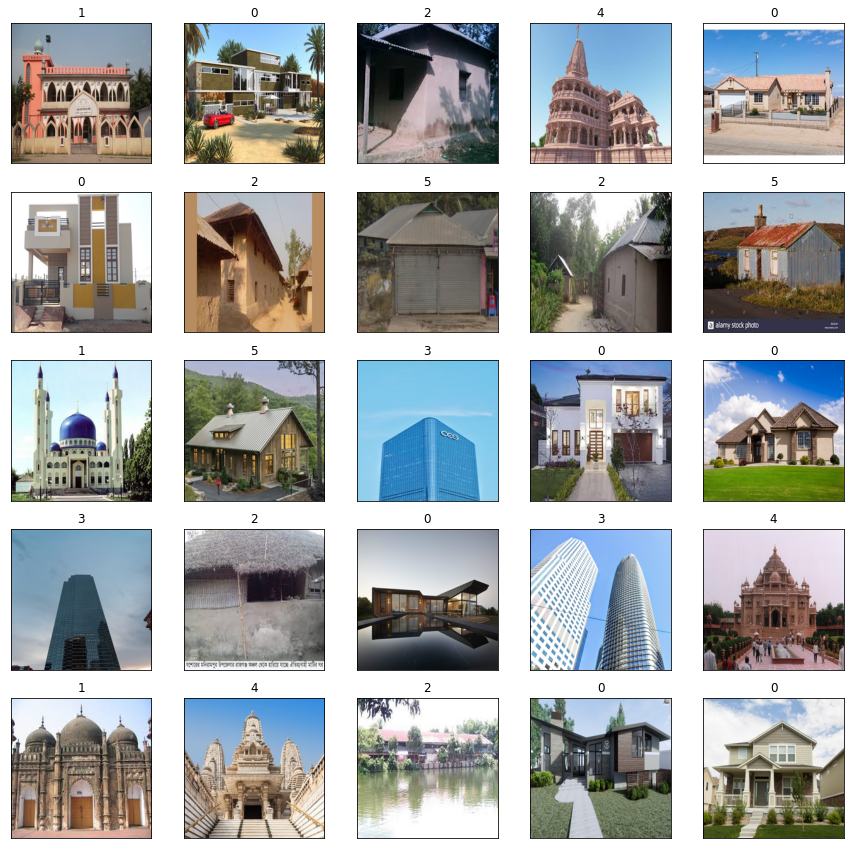

In [13]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

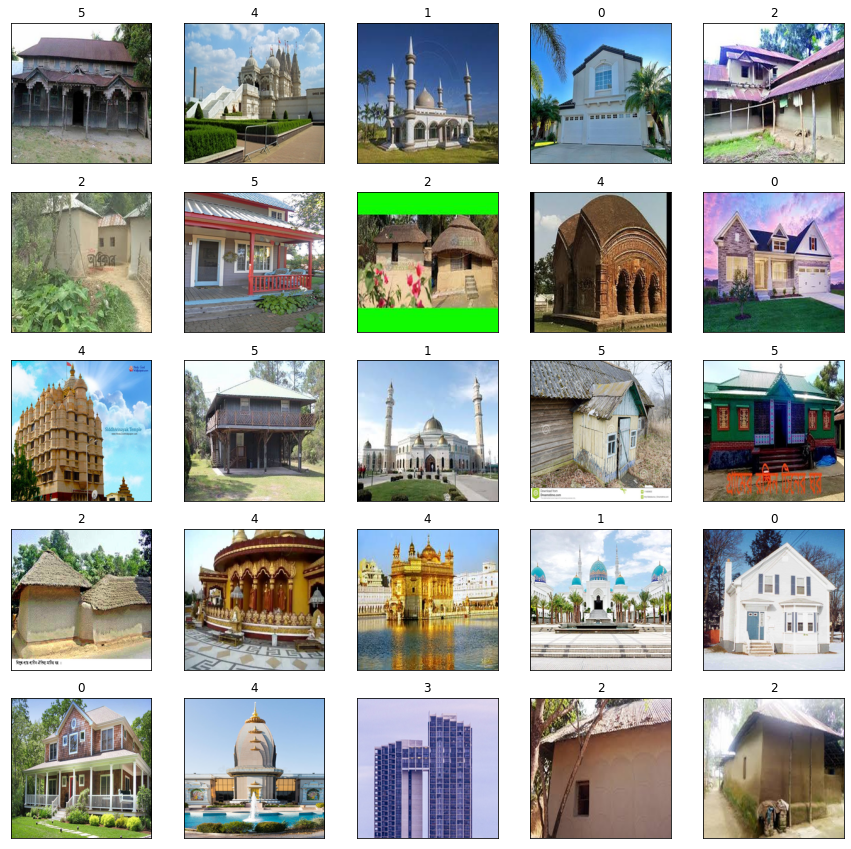

In [14]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Library

In [15]:
from tensorflow.keras import layers
from tensorflow import keras

## Create mobilenet Block

In [16]:
def mobilenet_block(x,filters,strides):
    x=layers.DepthwiseConv2D(kernel_size=3,strides=strides,padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    
    x=layers.Conv2D(filters=filters,kernel_size=1,strides=1,padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    
    return x
    
    

## Define Complex Mobilenet Input

In [17]:
total_class=6
INPUT_SHAPE=(224,224,3)
model_input=layers.Input(INPUT_SHAPE)

In [18]:
x=layers.Conv2D(filters=32,kernel_size=3,strides=2,padding='same')(model_input)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)

## Call MobileNet Block

In [19]:
x=mobilenet_block(x,filters=64,strides=1)
x=mobilenet_block(x,filters=128,strides=2)
x=mobilenet_block(x,filters=128,strides=1)
x=mobilenet_block(x,filters=256,strides=2)
x=mobilenet_block(x,filters=256,strides=1)
x=mobilenet_block(x,filters=512,strides=2)


In [20]:
for i in range(5):
    x=mobilenet_block(x,filters=512,strides=1)

In [21]:
x=mobilenet_block(x,filters=1024,strides=2)
x=mobilenet_block(x,filters=1024,strides=1)

In [22]:
x=layers.AvgPool2D(pool_size=7,strides=1)(x)
x=layers.Flatten()(x)

In [23]:
output=layers.Dense(units=total_class,activation='sigmoid')(x)

## Inplement MobileNet Model

In [24]:
model=keras.Model(inputs=model_input,outputs=output)


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 32)      0     

In [26]:
import time
print(time.time())

1622391041.5277033


In [27]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet'+str(int(t))+'.png'
image_name

'/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet1622391041.png'

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet1622391041.png


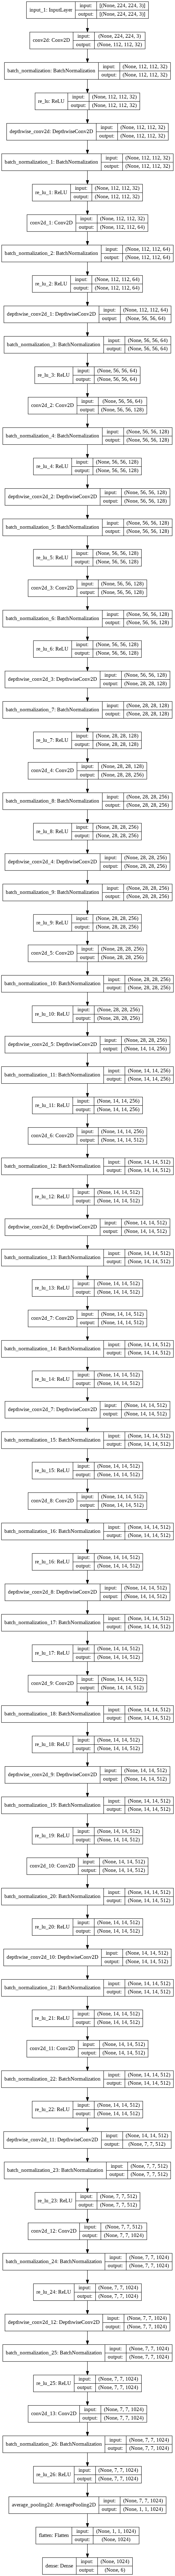

In [28]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

In [29]:
## Compile The Model 

In [30]:
model.compile( loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Trained the Model

In [39]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/200
30/30 [==============================] - 7s 236ms/step - loss: 0.1196 - accuracy: 0.9583 - val_loss: 4.0646 - val_accuracy: 0.2991
Epoch 2/200
30/30 [==============================] - 7s 234ms/step - loss: 0.1187 - accuracy: 0.9594 - val_loss: 4.2082 - val_accuracy: 0.3482
Epoch 3/200
30/30 [==============================] - 7s 233ms/step - loss: 0.1056 - accuracy: 0.9625 - val_loss: 3.3551 - val_accuracy: 0.3795
Epoch 4/200
30/30 [==============================] - 7s 229ms/step - loss: 0.1510 - accuracy: 0.9448 - val_loss: 1.7761 - val_accuracy: 0.6250
Epoch 5/200
30/30 [==============================] - 7s 225ms/step - loss: 0.1283 - accuracy: 0.9583 - val_loss: 1.9942 - val_accuracy: 0.5893
Epoch 6/200
30/30 [==============================] - 7s 222ms/step - loss: 0.0865 - accuracy: 0.9698 - val_loss: 2.1439 - val_accuracy: 0.5804
Epoch 7/200
30/30 [==============================] - 7s 221ms/step - loss: 0.1281 - accuracy: 0.9604 - val_loss: 2.8021 - val_accuracy: 0.5893

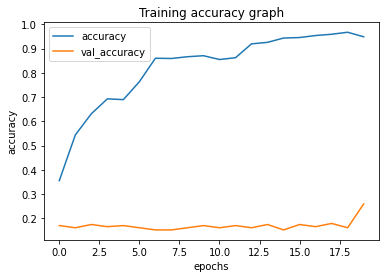

In [33]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

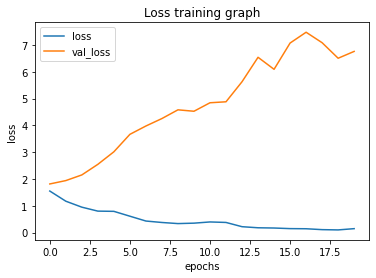

In [34]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [35]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)


10/10 [==============================] - 105s 12s/step - loss: 6.6961 - accuracy: 0.2233
Test Loss:  6.696098804473877
Test Accuracy:  0.22333332896232605


## Saved Model

In [36]:
import time
t = time.time()

export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/MobileNet0.22333332896232605_model_1622391741.h5


In [37]:
from tensorflow.keras.models import load_model

In [38]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 32)      0     